# Apply $\pi^+/\pi^-$ acceptance matching cut in $p-\theta$ plane 

last edit Mar-10, 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
r2d = 180./np.pi

In [2]:
main_data_path     = '/Users/erezcohen/Desktop/data/BAND/'
e_e_pi_data_path   = main_data_path + 'SIDIS_skimming/'
e_e_pi_n_data_path = main_data_path + 'merged_SIDIS_and_BAND_skimming/'

In [3]:
pi_charge_names  = ['piplus'   ,'piminus'  ]
pi_labels        = ['\pi^{+}'  ,'\pi^{-}'  ]
pi_colors        = ['royalblue','salmon'   ]

## Auxiliary functions

# load data from 101 runs of 10.2 GeV

In [5]:
runs_filename = "/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/macros/runlists/good_runs_10-2.txt"
Nruns = 1

In [6]:
# Using readlines()
runs_file     = open(runs_filename, 'r')
run_fileLines = runs_file.readlines()
runs = []
for line in run_fileLines[0:Nruns]:#{
    run = int(line.strip())
    runs.append(run)
runs = np.array(runs)
runs

array([6420])

In [7]:
fdebug   = 1
e_e_pi   = dict()
for runnum,runIdx in zip(runs,range(len(runs))):
    for pi_charge_name in pi_charge_names:
        eepi   = pd.read_csv(e_e_pi_data_path 
                                           +'skimmed_SIDIS_inc_00%d_e_%s_selected_eepi_kinematics.csv'%(runnum,pi_charge_name))
        if fdebug>1: print('loaded',len(eepi),'(e,e',pi_charge_name,') events ')    
            
        if runIdx==0:             
            e_e_pi[pi_charge_name]   = eepi
        else:
            e_e_pi[pi_charge_name]   = pd.concat([e_e_pi[pi_charge_name],  eepi ])
    print('loaded file %d/%d files'%(runIdx,len(runs)))
    
print('done.')

loaded file 0/1 files
done.


# Plot $p$ vs. $\theta$ for different sectors

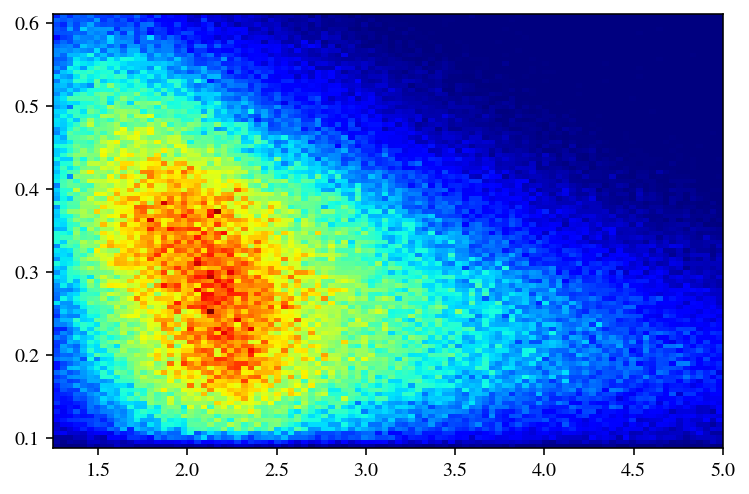

In [14]:
pi_charge_name = 'piplus'
df = e_e_pi[pi_charge_name]
plt.hist2d(df.pi_P,df.pi_Theta,cmap='jet',bins=100);
# for key in df.keys():
#     print(key)

# Compute and plot the angle between the hadron and the electron

In [21]:
Theta_e_pi = dict()
for pi_charge_name in pi_charge_names:
    
    P_e = np.array(e_e_pi[pi_charge_name].e_P)
    Theta_e = np.array(e_e_pi[pi_charge_name].e_Theta)
    Phi_e = np.array(e_e_pi[pi_charge_name].e_Phi)

    Px_e = P_e * np.sin(Theta_e) * np.cos(Phi_e)
    Py_e = P_e * np.sin(Theta_e) * np.sin(Phi_e)
    Pz_e = P_e * np.cos(Theta_e) 
    
    P_pi = np.array(e_e_pi[pi_charge_name].pi_P)
    Theta_pi = np.array(e_e_pi[pi_charge_name].pi_Theta)
    Phi_pi = np.array(e_e_pi[pi_charge_name].pi_Phi)

    Px_pi = P_pi * np.sin(Theta_pi) * np.cos(Phi_pi)
    Py_pi = P_pi * np.sin(Theta_pi) * np.sin(Phi_pi)
    Pz_pi = P_pi * np.cos(Theta_pi) 

    cos_Theta_e_pi = (Px_e*Px_pi + Py_e*Py_pi + Pz_e*Pz_pi)/(P_e*P_pi)
    Theta_e_pi[pi_charge_name] = np.arccos(cos_Theta_e_pi)
    
print('done computation')

done computation


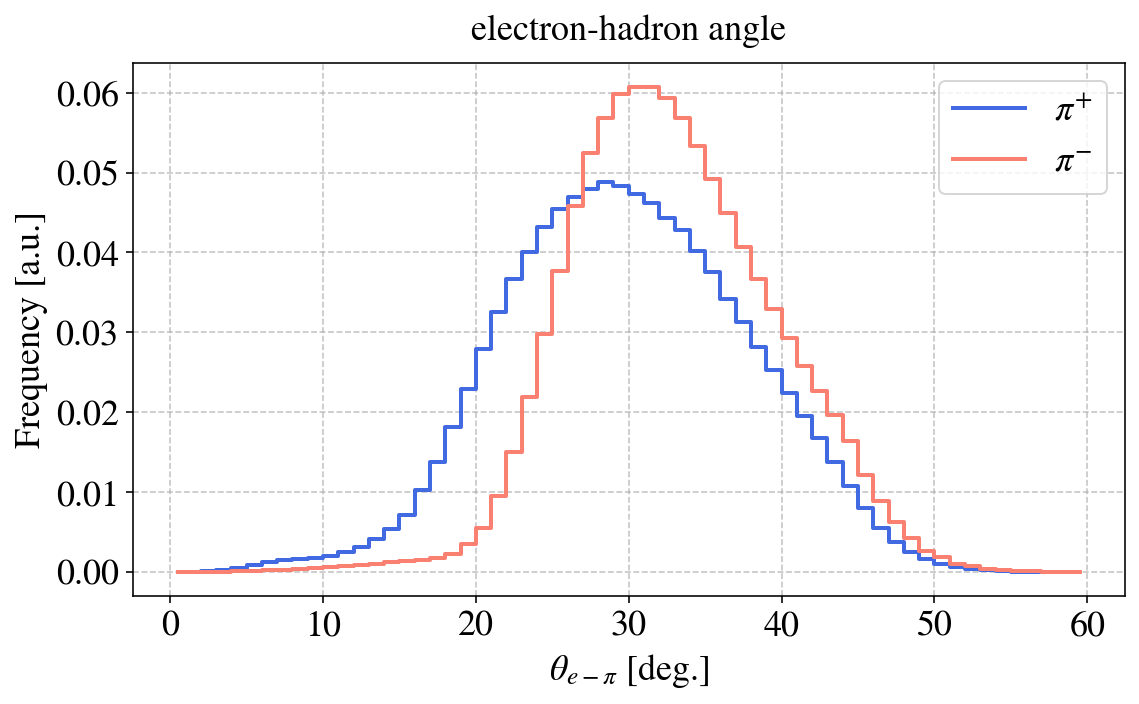

In [36]:
bins = np.linspace(0,60,61)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
for pi_charge_name,pi_label,pi_color in zip(pi_charge_names,pi_labels,pi_colors):
    theta = Theta_e_pi[pi_charge_name] 
    # plot_step_hist( theta*r2d, bins=bins , label=pi_label , color=pi_color)
    h,edges = np.histogram( theta*r2d, bins=bins, density=True )
    x = (edges[1:]+edges[:-1])/2
    plt.step( x, h , where='mid'  , color=pi_color , label='$'+pi_label+'$', linewidth=2)
    
set_axes(ax,"$\\theta_{e-\pi}$ [deg.]" ,
         "Frequency [a.u.]" ,
         title='electron-hadron angle',
     do_add_grid=True, do_add_legend=True, fontsize=fontsize);
# #}
plt.tight_layout()